S4- CASO PRACTICO-BDD FINAL

Elaborado por: Carlos León Mosquera & Selene Vélez Vergara

Modelar a su preferencia (pero justificado datos de la cadena de supermercados de EEUU, Wallmart. 

La base con la que trabajaremos este caso  práctico contiene información sobre datos históricos de las ventas de Wallmart desde 2010-02-05 hasta 2012-11-01, en el archivo WalmartStoresales. Dentro de este archivo encontrará los siguientes campos:

Tienda-el número de la tienda.

Fecha-la semana de ventas

Weekly_Sales - ventas para la tienda dada.

Holiday_Flag: si la semana es una semana especial de vacaciones 1 – Semana de vacaciones 0 – Semana no festiva.

Temperatura - Temperatura el día de la venta.

Fuel_price -costo del combustible en la región. 

IPC-índice de precios al consumidor vigente. 

Desempleo - tasa de desempleo predominante. 

Eventos festivos.

Super bowl: 12 de febrero de 2010, 11 de febrero de 2011, 10 de febrero de 2012, 8 de febrero de 2013\ 

Día del Trabajo: 10-sep-10, 9-sep-11, 7-sep-12, 6-sep-13\

Acción de Gracias: 26-nov-10, 25-nov-11, 23-nov-12, 29-nov-13\

Navidad: 31-dic-10, 30-dic-11, 28-dic-12, 27-dic-13

1.- Importe la base de datos a una base en Jupyter Notebook con pandas. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats.api as sms
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.compat import lzip

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Walmart.csv", sep=',', quotechar='"')

In [3]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [4]:
df.rename({'Store': 'Tienda' ,'Date': 'Fecha' ,'Temperature': 'Temperatura' ,'Unemployment': 'Desempleo' ,'CPI': 'IPC' ,'Weekly_Sales': 'Ventas_Semanales' ,'Holiday_Flag': 'Semana_Festiva' ,'Fuel_Price': 'Precio_Combustible'}, axis=1, inplace=True)

In [5]:
df

,Tienda,Fecha,Ventas_Semanales,Semana_Festiva,Temperatura,Precio_Combustible,IPC,Desempleo
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


2.- Obtenga los descriptivos resumen de la base de datos e identifique a las variables numéricas y categóricas. ¿Hay algo que le llame la atención? 

In [6]:
df.describe()

,Tienda,Ventas_Semanales,Semana_Festiva,Temperatura,Precio_Combustible,IPC,Desempleo
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


En la base de datos en análisis se presentan variables tanto numéricas como categóricas, entre las variables numéricas tenemos: Ventas_Semanales (considerada como variable dependiente), Temperatura, Precio_Combustible, IPC y Desempleo; entre las variables categóricas están: Tienda y Semana Festiva.

Entre las variables que presentan datos llamativos se encuentran las ventas semanales en donde se puede observar que los valores mínimos y máximos varían de forma considerable lo que representa una gran variabilidad que podría depender de factores externos,  la variable Temperatura que se encuentra registrada en grados Fahrenheit tiene un valor mínimo de -2.06 lo cual resulta en un valor atípico y que debe ser evaluado, a su vez la variable Semana Festiva en donde es posible notar que la mayoría de las semanas es no festiva, dato que es posible comprobar validando que cada año tiene 52 semanas, por las cuales solo 4 semanas al año son festivas y las demás son no festivas.

3.- Evalúe si la base contiene datos perdidos.

In [7]:
df.isna().sum()

Tienda                0
Fecha                 0
Ventas_Semanales      0
Semana_Festiva        0
Temperatura           0
Precio_Combustible    0
IPC                   0
Desempleo             0
dtype: int64

Para el caso en análisis, se confirma que la base de datos no contiene valores perdidos, por lo tanto, se podrá obtener un análisis de la información completo y sin omitir ningún dato, esto además nos indica que la base de datos seleccionada esta en óptimas condiciones para continuar con nuestro análisis.

4.- Evalúe si alguna de las variables contiene datos atípicos (outliers) 
De ser el caso, detalle cuáles y qué método estadístico aplicarán para corregir.

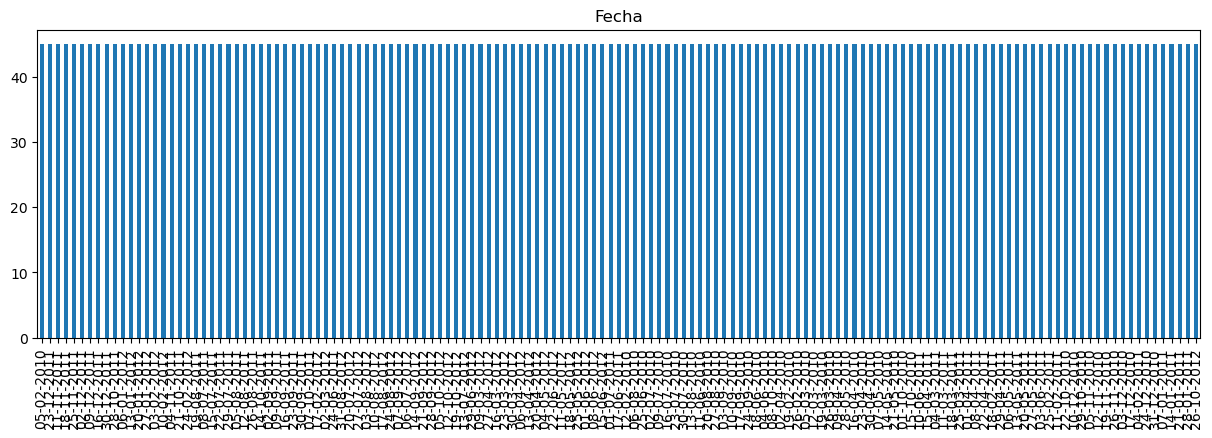

In [8]:
for i in df.select_dtypes(["object"]).columns:
    if df[i].dtype=="object":
        plt.figure(figsize=(15, 4))
        df[i].value_counts().plot(kind='bar', title=str(i))
        plt.show()

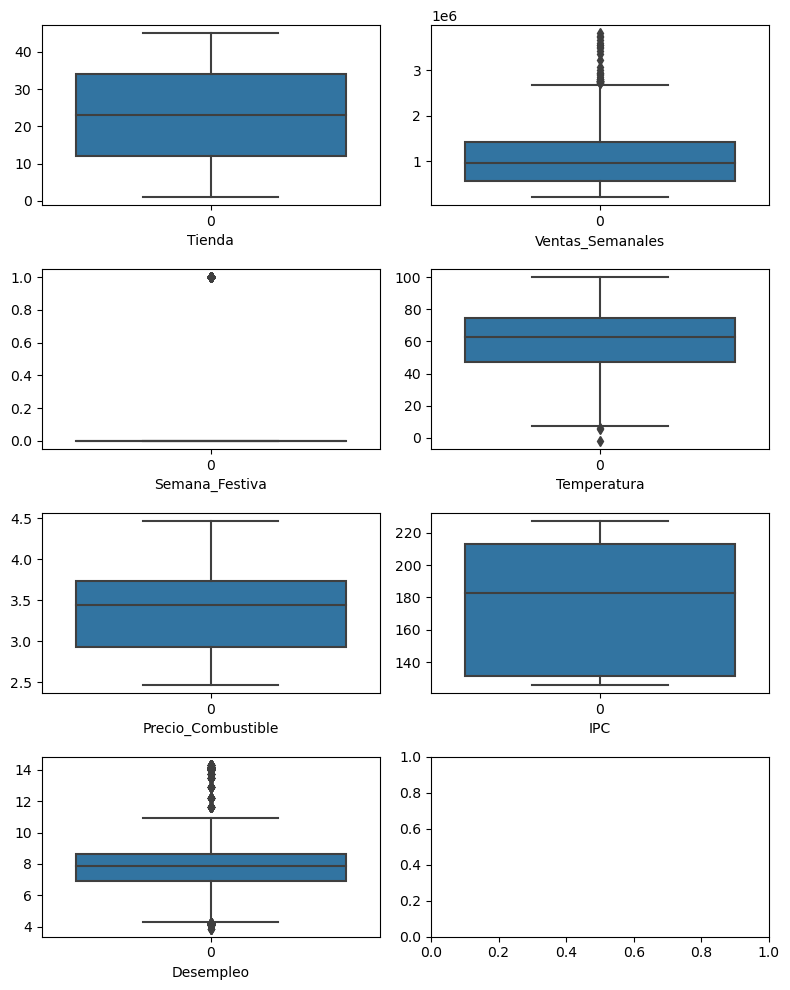

In [9]:
fig, axs = plt.subplots(4, 2, figsize=(8, 10))
plt1 = sns.boxplot(df['Tienda'], ax=axs[0, 0]).set_xlabel('Tienda')
plt2 = sns.boxplot(df['Ventas_Semanales'], ax=axs[0, 1]).set_xlabel('Ventas_Semanales')
plt3 = sns.boxplot(df['Semana_Festiva'], ax=axs[1, 0]).set_xlabel('Semana_Festiva')
plt4 = sns.boxplot(df['Temperatura'], ax=axs[1, 1]).set_xlabel('Temperatura')
plt5 = sns.boxplot(df['Precio_Combustible'], ax=axs[2, 0]).set_xlabel('Precio_Combustible')
plt6 = sns.boxplot(df['IPC'], ax=axs[2, 1]).set_xlabel('IPC')
plt7 = sns.boxplot(df['Desempleo'], ax=axs[3, 0]).set_xlabel('Desempleo')

plt.tight_layout()

In [10]:
Q1 = df.Ventas_Semanales.quantile(0.25)
Q3 = df.Ventas_Semanales.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

866808.5549999999


In [11]:
df = df[~((df['Ventas_Semanales'] < (Q1 - 1.5 * IQR)) |(df['Ventas_Semanales'] > (Q3 + 1.5 * IQR)))]
df.shape

(6401, 8)

<Axes: xlabel='Ventas_Semanales', ylabel='Density'>

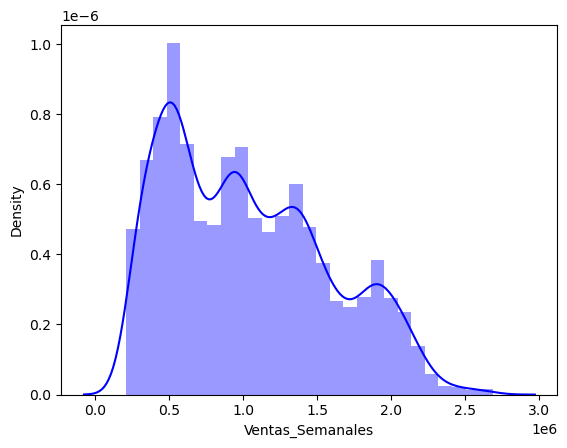

In [12]:
sns.distplot(df['Ventas_Semanales'],color="blue")

In [13]:
Q1 = df.Temperatura.quantile(0.25)
Q3 = df.Temperatura.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

27.340000000000003


In [14]:
df = df[~((df['Temperatura'] < (Q1 - 1.5 * IQR)) |(df['Temperatura'] > (Q3 + 1.5 * IQR)))]
df.shape

(6398, 8)

<Axes: xlabel='Temperatura', ylabel='Density'>

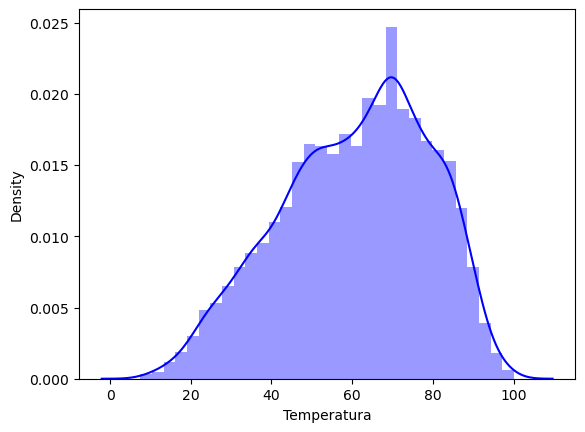

In [15]:
sns.distplot(df['Temperatura'],color="blue")

In [16]:
Q1 = df.Precio_Combustible.quantile(0.25)
Q3 = df.Precio_Combustible.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

0.8040000000000003


In [17]:
df = df[~((df['Precio_Combustible'] < (Q1 - 1.5 * IQR)) |(df['Precio_Combustible'] > (Q3 + 1.5 * IQR)))]
df.shape

(6398, 8)

<Axes: xlabel='Precio_Combustible', ylabel='Density'>

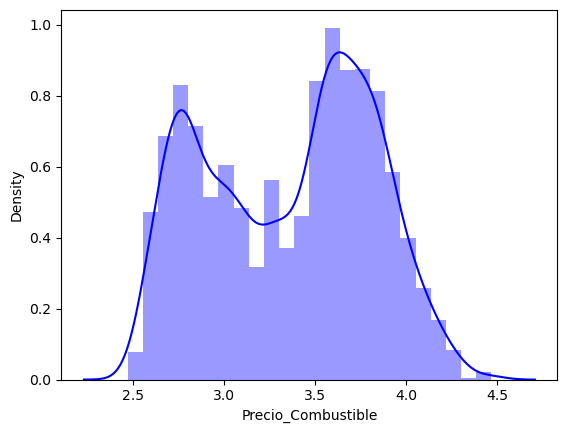

In [18]:
sns.distplot(df['Precio_Combustible'],color="blue")

In [19]:
Q1 = df.IPC.quantile(0.25)
Q3 = df.IPC.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

81.04963990000002


In [20]:
df = df[~((df['IPC'] < (Q1 - 1.5 * IQR)) |(df['IPC'] > (Q3 + 1.5 * IQR)))]
df.shape

(6398, 8)

<Axes: xlabel='IPC', ylabel='Density'>

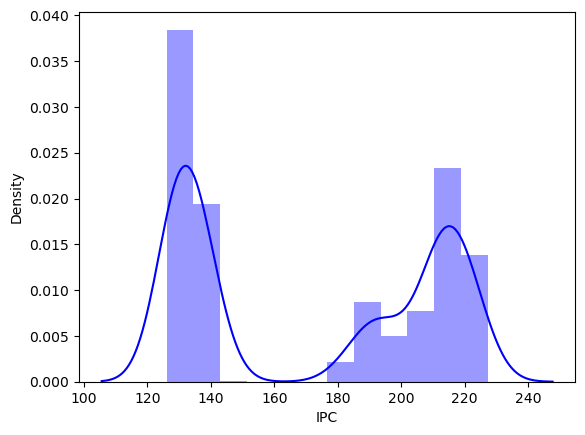

In [21]:
sns.distplot(df['IPC'],color="blue")

In [22]:
Q1 = df.Desempleo.quantile(0.25)
Q3 = df.Desempleo.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

1.7309999999999999


In [23]:
df = df[~((df['Desempleo'] < (Q1 - 1.5 * IQR)) |(df['Desempleo'] > (Q3 + 1.5 * IQR)))]
df.shape

(5917, 8)

<Axes: xlabel='Desempleo', ylabel='Density'>

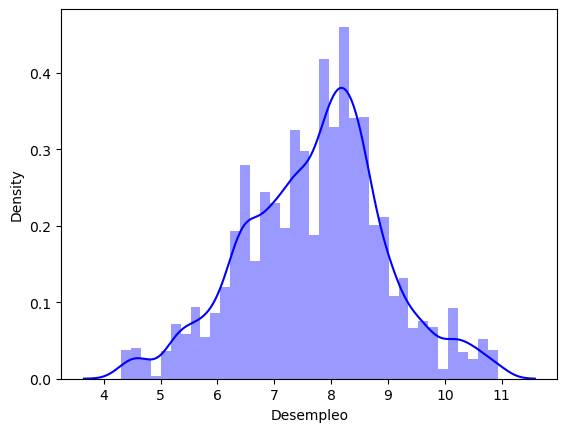

In [24]:
sns.distplot(df['Desempleo'],color="blue")

Para evaluar si la base de datos tiene valores atípicos se utilizó para las variables categóricas el dtype y para las variables numéricas el boxplot en donde es posible observar los datos que se presentan por cada variable y si presentan valores atípicos. En nuestra base efectivamente existen variables con valores atípicos, mismos que deben ser revisados y mediante la función estadística IQR en donde es posible observar los cuartiles se excluyeron ciertos valores que resultaban atípicos, para que nuestro análisis se realice con precisión y se nos permita observar el nivel de significancia de las variables sobre nuestra variable Y, en este caso se presentaron valores atípicos en las variables: Ventas_Semanales, Temperatura, Precio_Combustible, IPC (Índice de Confianza del Consumidor) y Desempleo.

5.- Grafique las distribuciones de las variables y a priori comente sobre ellas.

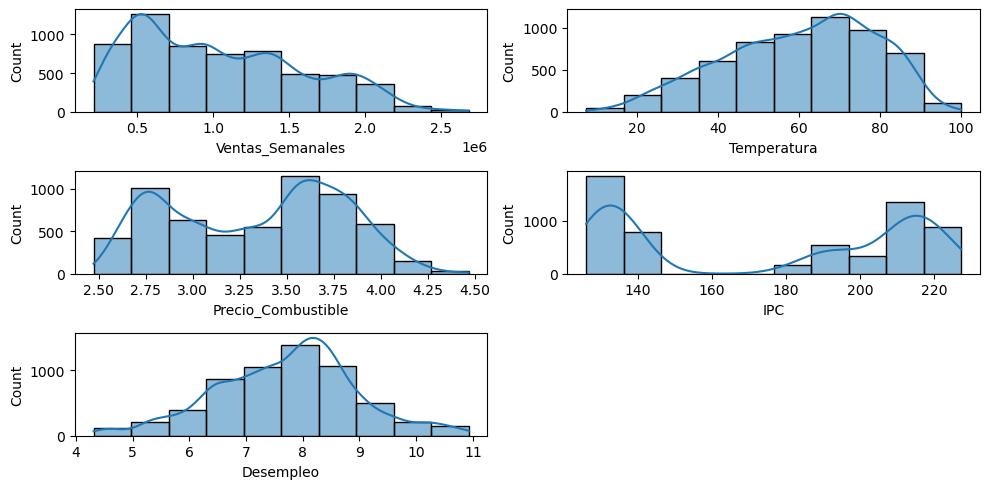

In [25]:
df = pd.DataFrame(df)

plt.figure(figsize=(10, 5))
plt.subplot(3, 2, 1)
sns.histplot(df['Ventas_Semanales'], bins=10, kde=True)

plt.subplot(3, 2, 2)
sns.histplot(df['Temperatura'], bins=10, kde=True)

plt.subplot(3, 2, 3)
sns.histplot(df['Precio_Combustible'], bins=10, kde=True)

plt.subplot(3, 2, 4)
sns.histplot(df['IPC'], bins=10, kde=True)

plt.subplot(3, 2, 5)
sns.histplot(df['Desempleo'], bins=10, kde=True)

plt.tight_layout()
plt.show()

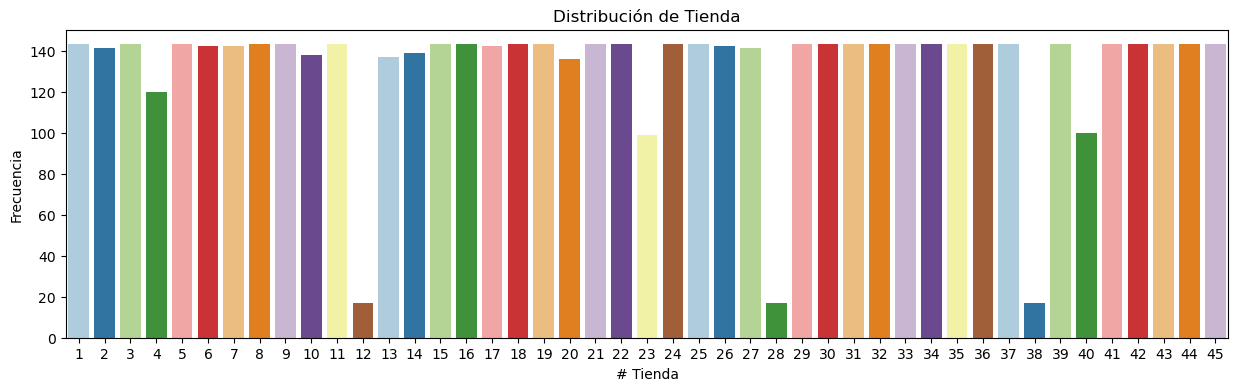

In [26]:
plt.figure(figsize=(15, 4))
sns.countplot(df, x='Tienda', palette='Paired')
plt.xlabel('# Tienda')
plt.ylabel('Frecuencia')
plt.title('Distribución de Tienda')
plt.show()

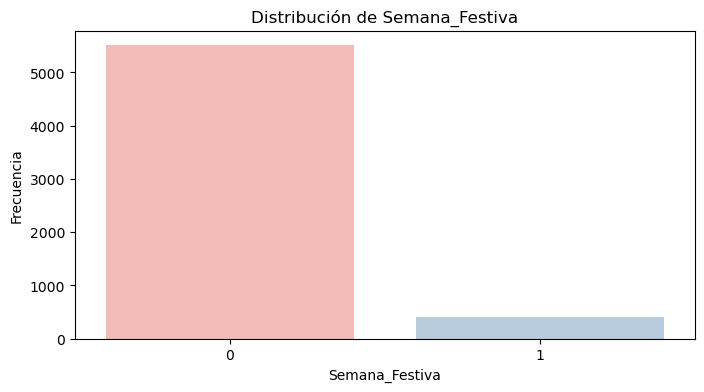

In [27]:
plt.figure(figsize=(8, 4))
sns.countplot(df, x='Semana_Festiva', palette='Pastel1')
plt.xlabel('Semana_Festiva')
plt.ylabel('Frecuencia')
plt.title('Distribución de Semana_Festiva')
plt.show()

Para graficar las distribuciones de las variables se utilizaron histogramas para cada variable numérica, en donde es posible visualizar el comportamiento de cada variable según el número de datos obtenidos para lo cual tenemos:

Ventas_Semanales: En esta variable se observa una amplia variabilidad. El valor promedio de ventas semanales es de aproximadamente 1,046,965, pero la desviación estándar es relativamente alta, lo que sugiere una dispersión significativa en los datos. Además, observamos que las ventas semanales varían desde un mínimo de alrededor de 209,986 hasta un máximo de aproximadamente 3,818,686.

Temperatura: En esta variable hay una temperatura mínima registrada de aproximadamente -2.06°F y la máxima es de alrededor de 100.14°F. La temperatura parece tener una distribución amplia y puede ser importante para comprender su impacto en las ventas semanales.

Precio_Combustible: En esta variable el rango de precios de combustible parece estar entre aproximadamente 2.47 y 4.47. La media y la mediana (50%) están cerca, lo que indica una distribución que podría ser aproximadamente simétrica.

IPC: En esta variable existe un rango que va desde alrededor de 126.06 hasta 227.23. El IPC es una medida importante para comprender la inflación y podría estar relacionado con las ventas semanales.

Desempleo: Esta variable numérica tiene un rango desde aproximadamente 3.88 hasta 14.31. La tasa de desempleo también podría ser un factor importante que influya en las ventas semanales.

En el caso de las variables de tipo categóricas, tenemos lo siguiente:

Tienda: En esta variable se pueden observar todas las tiendas que están dentro del caso, lo cual es interesante ya que es posible visualizar que hay tiendas especificas que no siguen los mismos patrones de frecuencia, lo cual podría ser afectado por otras variables o eventos en donde esas tiendas en específico se vean afectadas por factores externos.

Semana_Festiva: La mayoría de las observaciones se encuentran en 0 que significa "Semana no festiva", esto demuestra lo indicado con anterioridad, que por cada año que contiene alrededor de 52 semana solo 4 semanas representan a las semanas festivas o de tipo 1, lo cual se puede observar en el gráfico y resulta en información relevante para evaluar las ventas semanales.

6.- Obtenga las correlaciones entre los datos de corte numérico.

In [28]:
df.corr(numeric_only=True).style.background_gradient(cmap='coolwarm')

,Tienda,Ventas_Semanales,Semana_Festiva,Temperatura,Precio_Combustible,IPC,Desempleo
Tienda,1.000000,-0.319354,0.004289,-0.027045,0.047519,-0.208637,0.309645
Ventas_Semanales,-0.319354,1.000000,0.024390,-0.041686,0.019664,-0.082977,-0.073092
Semana_Festiva,0.004289,0.024390,1.000000,-0.157220,-0.076529,-0.000450,0.011031
Temperatura,-0.027045,-0.041686,-0.157220,1.000000,0.145157,0.217847,0.024204
Precio_Combustible,0.047519,0.019664,-0.076529,0.145157,1.000000,-0.144515,-0.105214
IPC,-0.208637,-0.082977,-0.000450,0.217847,-0.144515,1.000000,-0.219020
Desempleo,0.309645,-0.073092,0.011031,0.024204,-0.105214,-0.219020,1.000000


In [29]:
var_cuantitativas = df.select_dtypes('number').columns
var_cualitativas  =df.select_dtypes('object').columns

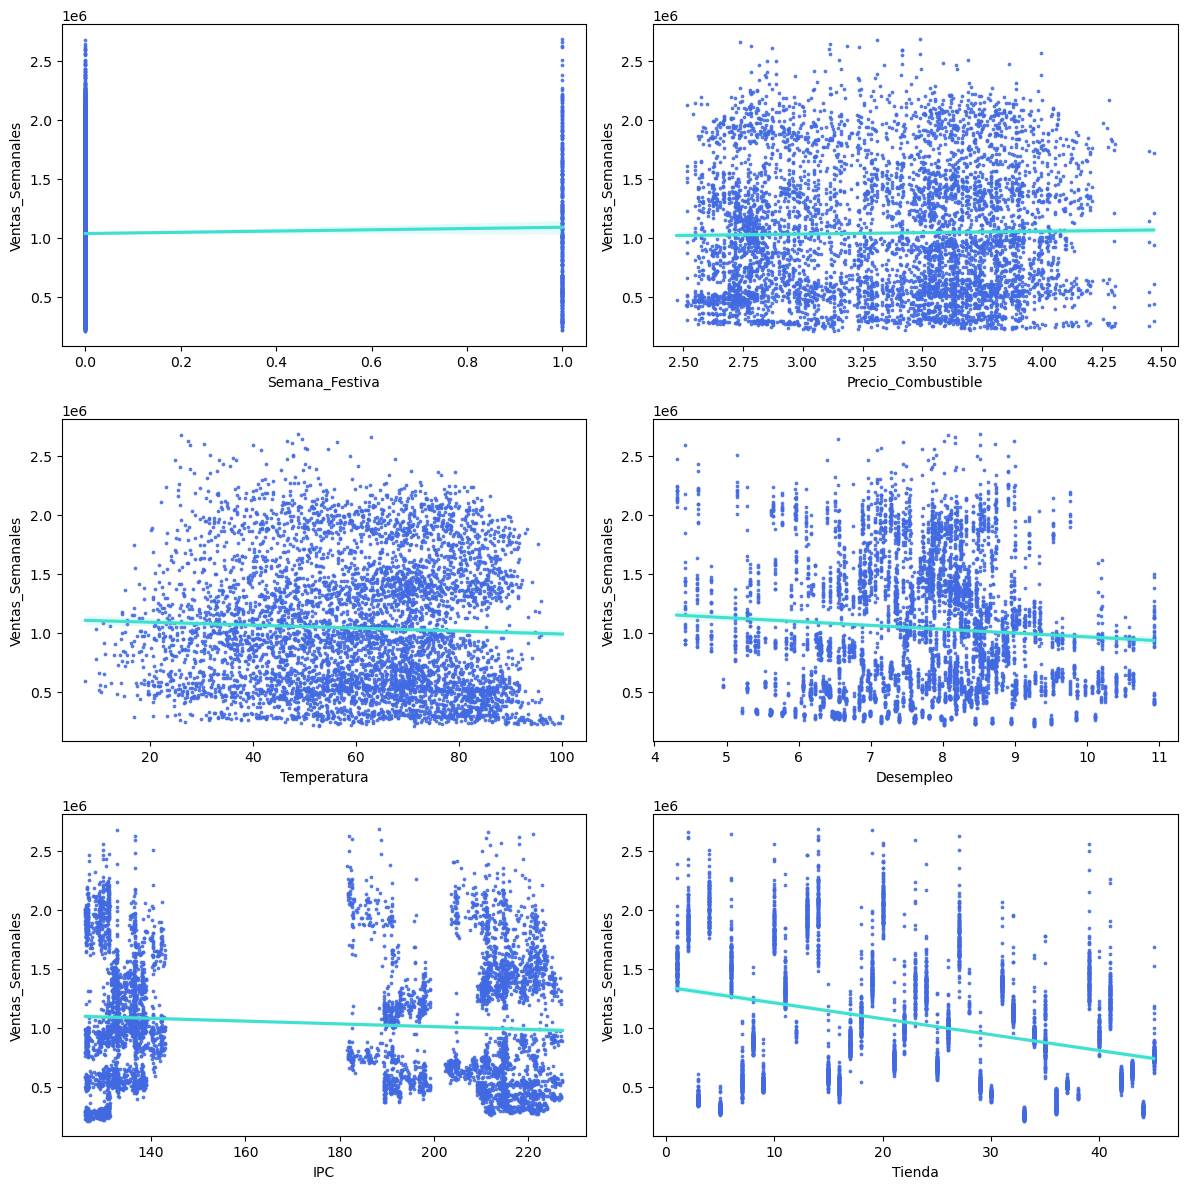

In [30]:
n = 7
fig = plt.figure(figsize=(12,12))
corr = df.corr()
cols = corr.nlargest(7, "Ventas_Semanales")["Ventas_Semanales"].index
for i in np.arange(1,7):
    regline = df[cols[i]]
    ax = fig.add_subplot(3,2,i)
    sns.regplot(x=regline, y=df['Ventas_Semanales'], scatter_kws={"color": "royalblue", "s": 3},
                line_kws={"color": "turquoise"})
plt.tight_layout()
plt.show()

Para el análisis de la correlación entre variables se debe aclarar que, aunque las variables Tiendas y Semanas_Festivas se presenten como datos numéricos, estas representan datos categóricos por lo tal, se considerará solo a las variables del tipo numérico.
Se ha ejecutado el código para obtener la información sobre la correlación entre variables numéricas, a modo que sea visible en formato de matriz, es interesante ver que no existe una fuerte correlación entere variables, siendo que en su totalidad se presentan como datos dispersos entre si y que según se observa podrían representar eventos diferentes y que no influyen en la variable dependiente Ventas_Semanales, esto aún debe ser evaluado para tomar la decisión definitiva del modelo y determinar cuál es la significancia de las variables entre sí.

Entre la correlación negativa extrema tenemos a las variables: Tienda y Desempleo, lo cual nos podría sugerir que independientemente del número de tiendas que existan no se relaciona con la tasa de desempleo, y se deben analizar como eventos diferenciados, otra correlación significativa es la de: Desempleo e IPC en donde es posible observar que hay una correlación moderada lo cual podría significar que el índice de precios del consumidor tiene relación con el desempleo, hecho que desde un punto de vista económico tiene coherencia, ya que esta variable considera factores como la inflación, el cual actúa como factor en los hábitos de consumo de las personas.

7.- Comente que variable escogerán como variable dependiente y que variables introducirán a su modelo.

Para el presente caso se ha seleccionado como variable dependiente a Ventas_Semanales, puesto que representa el rendimiento de ventas semanales, que es una métrica clave para la empresa de retail. Por lo tanto, sería la variable dependiente en el modelo, ya que se desea predecir o explicar sus variaciones.

Las demás variables son consideradas como dependientes y para determinar exactamente cuales son las variables mas relevantes para el modelo, se introduciran todas las variables independientes, para de esta forma evaluar de mejor forma su significancia y poder presentar el modelo con datos relevantes para su análisis, entre estas variables se presentan:

Tienda: Dado que la tienda parece tener una correlación significativa con las ventas semanales, sería importante incluir esta variable en el modelo para capturar las diferencias entre tiendas.

Semana_Festiva: Aunque la correlación es baja, la presencia de semanas festivas puede influir en las ventas. Por lo tanto, podría ser útil incluir esta variable como un factor adicional.

Temperatura: A pesar de su correlación baja, la temperatura podría afectar las decisiones de compra de los clientes, especialmente en productos estacionales. Podría ser beneficioso incluir esta variable.

Precio_Combustible: Aunque la correlación es baja, los cambios en el precio del combustible pueden afectar los costos operativos y, en última instancia a las ventas. Podría ser interesante explorar su inclusión.

IPC (Índice de Precios al Consumidor): El IPC refleja la inflación y puede tener un impacto en el poder adquisitivo de los clientes. Al incluir esta variable podría ayudar a capturar efectos macroeconómicos en las ventas.

Desempleo: La tasa de desempleo puede influir en la disposición de las personas a gastar. Podría ser relevante incluir esta variable como un indicador económico.

Es importante evaluar la multicolinealidad entre las variables independientes y considerar técnicas de selección de características si es necesario. El objetivo final es construir un modelo que sea capaz de predecir con precisión las ventas semanales y que sea interpretable y útil para la toma de decisiones en Walmart.

8.- Indique que tipo de modelación realizarán y porqué.

In [31]:
log_Ventas=np.log(df.Ventas_Semanales)
df['log_Ventas']=log_Ventas

In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
labelencoder = LabelEncoder()

In [34]:
df.Fecha = labelencoder.fit_transform(df.Fecha)
df

,Tienda,Fecha,Ventas_Semanales,Semana_Festiva,Temperatura,Precio_Combustible,IPC,Desempleo,log_Ventas
0,1,19,1643690.90,0,42.31,2.572,211.096358,8.106,14.312455
1,1,52,1641957.44,1,38.51,2.548,211.242170,8.106,14.311400
2,1,85,1611968.17,0,39.93,2.514,211.289143,8.106,14.292966
3,1,118,1409727.59,0,46.63,2.561,211.319643,8.106,14.158907
4,1,20,1554806.68,0,46.50,2.625,211.350143,8.106,14.256862
...,...,...,...,...,...,...,...,...,...
6430,45,130,713173.95,0,64.88,3.997,192.013558,8.684,13.477481
6431,45,22,733455.07,0,64.89,3.985,192.170412,8.667,13.505522
6432,45,55,734464.36,0,54.47,4.000,192.327265,8.667,13.506897
6433,45,88,718125.53,0,56.47,3.969,192.330854,8.667,13.484400


In [35]:
regresion = ols("Ventas_Semanales ~ Tienda + Fecha + Semana_Festiva + Temperatura + Precio_Combustible + IPC + Desempleo", data=df)
results = regresion.fit()

In [36]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       Ventas_Semanales   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     123.4
Date:                Sun, 08 Oct 2023   Prob (F-statistic):          8.14e-170
Time:                        23:39:01   Log-Likelihood:                -86222.
No. Observations:                5917   AIC:                         1.725e+05
Df Residuals:                    5909   BIC:                         1.725e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           1.697e+06   8.54

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [38]:
df2=df[df.columns.difference(['Ventas_Semanales', 'log_Ventas'])]
df2

,Desempleo,Fecha,IPC,Precio_Combustible,Semana_Festiva,Temperatura,Tienda
0,8.106,19,211.096358,2.572,0,42.31,1
1,8.106,52,211.242170,2.548,1,38.51,1
2,8.106,85,211.289143,2.514,0,39.93,1
3,8.106,118,211.319643,2.561,0,46.63,1
4,8.106,20,211.350143,2.625,0,46.50,1
...,...,...,...,...,...,...,...
6430,8.684,130,192.013558,3.997,0,64.88,45
6431,8.667,22,192.170412,3.985,0,64.89,45
6432,8.667,55,192.327265,4.000,0,54.47,45
6433,8.667,88,192.330854,3.969,0,56.47,45


In [39]:
df2.dtypes

Desempleo             float64
Fecha                   int32
IPC                   float64
Precio_Combustible    float64
Semana_Festiva          int64
Temperatura           float64
Tienda                  int64
dtype: object

In [40]:
df2['Desempleo'] = df2['Desempleo'].fillna(0).replace([np.inf, -np.inf], np.nan).dropna().astype(int)
df2['IPC'] = df2['IPC'].fillna(0).replace([np.inf, -np.inf], np.nan).dropna().astype(int)
df2['Precio_Combustible'] = df2['Precio_Combustible'].fillna(0).replace([np.inf, -np.inf], np.nan).dropna().astype(int)
df2['Temperatura'] = df2['Temperatura'].fillna(0).replace([np.inf, -np.inf], np.nan).dropna().astype(int)

In [41]:
df2.dtypes

Desempleo             int32
Fecha                 int32
IPC                   int32
Precio_Combustible    int32
Semana_Festiva        int64
Temperatura           int32
Tienda                int64
dtype: object

In [42]:
vif_data = pd.DataFrame()
vif_data["feature"] = df2.columns
  
vif_data["VIF"] = [variance_inflation_factor(df2.values, i) for i in range(len(df2.columns))]

print(vif_data)

              feature        VIF
0           Desempleo  21.780630
1               Fecha   3.900265
2                 IPC  16.347016
3  Precio_Combustible  17.767272
4      Semana_Festiva   1.104341
5         Temperatura  12.456399
6              Tienda   4.549253


In [43]:
regresion_2 = ols("log_Ventas ~ Fecha + Semana_Festiva + Tienda + IPC + Precio_Combustible + Temperatura", data=df2)
results_2 = regresion_2.fit()

In [44]:
print(results_2.summary())

                            OLS Regression Results                            
Dep. Variable:             log_Ventas   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     107.6
Date:                Sun, 08 Oct 2023   Prob (F-statistic):          4.32e-129
Time:                        23:39:01   Log-Likelihood:                -4927.7
No. Observations:                5917   AIC:                             9869.
Df Residuals:                    5910   BIC:                             9916.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             14.4717      0

In [45]:
vif_data = pd.DataFrame()
vif_data["feature"] = df2.columns.difference(['Desempleo'])

vif_data["VIF"] = [variance_inflation_factor(df2[df2.columns.difference(['Desempleo'])].values, i) \
                   for i in range(len(df2[df2.columns.difference(['Desempleo'])].columns))]

print(vif_data)

              feature        VIF
0               Fecha   3.848000
1                 IPC  14.700924
2  Precio_Combustible  15.127796
3      Semana_Festiva   1.099237
4         Temperatura  11.939742
5              Tienda   3.770403


In [46]:
vif_data = pd.DataFrame()
vif_data["feature"] = df2.columns.difference(['Desempleo', 'Precio_Combustible'])

vif_data["VIF"] = [variance_inflation_factor(df2[df2.columns.difference(['Desempleo', 'Precio_Combustible'])].values, i) \
                   for i in range(len(df2[df2.columns.difference(['Desempleo', 'Precio_Combustible'])].columns))]

print(vif_data)

          feature        VIF
0           Fecha   3.691002
1             IPC  11.371232
2  Semana_Festiva   1.095933
3     Temperatura  10.772483
4          Tienda   3.390527


In [47]:
vif_data = pd.DataFrame()
vif_data["feature"] = df2.columns.difference(['Desempleo', 'Precio_Combustible', 'IPC'])

vif_data["VIF"] = [variance_inflation_factor(df2[df2.columns.difference(['Desempleo', 'Precio_Combustible', 'IPC'])].values, i) \
                   for i in range(len(df2[df2.columns.difference(['Desempleo', 'Precio_Combustible', 'IPC'])].columns))]

print(vif_data)

          feature       VIF
0           Fecha  3.429983
1  Semana_Festiva  1.072174
2     Temperatura  4.639512
3          Tienda  3.291033


In [48]:
regresion_3 = ols("log_Ventas ~ Fecha + Semana_Festiva + Temperatura + Tienda", data=df2)
results_3 = regresion_3.fit()

In [49]:
print(results_3.summary())

                            OLS Regression Results                            
Dep. Variable:             log_Ventas   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     131.6
Date:                Sun, 08 Oct 2023   Prob (F-statistic):          8.39e-108
Time:                        23:39:01   Log-Likelihood:                -4982.0
No. Observations:                5917   AIC:                             9974.
Df Residuals:                    5912   BIC:                         1.001e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         14.1626      0.031    456.

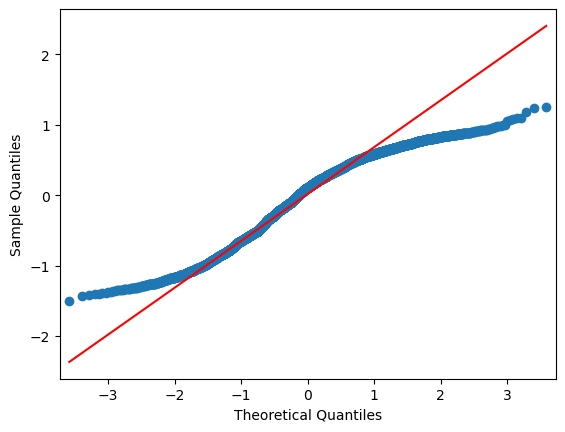

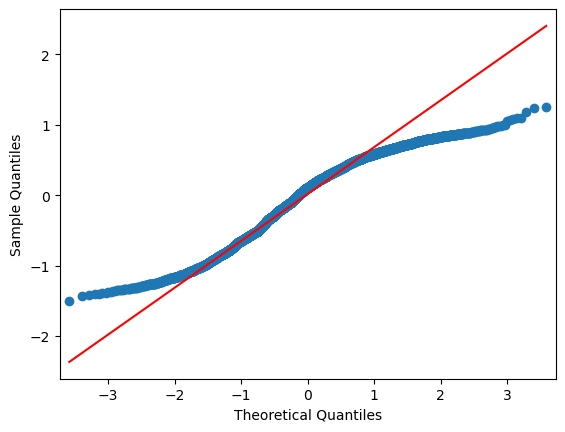

In [50]:
sm.qqplot(results_3.resid, line='q')

In [51]:
nombres = ["Jarque-Bera", "Chi^2 two-tail prob.", "Skew", "Kurtosis"]
jarque_bera = sms.jarque_bera(results_3.resid)
lzip(nombres, jarque_bera)

[('Jarque-Bera', 355.7391883505008),
 ('Chi^2 two-tail prob.', 5.6521899864852305e-78),
 ('Skew', -0.45960031024731995),
 ('Kurtosis', 2.22670359758125)]

In [52]:
results_3.resid.mean()

-3.0033249655839286e-15

In [53]:
y_pred=results_3.predict()

In [54]:
y = df['log_Ventas']
residuals = y - y_pred

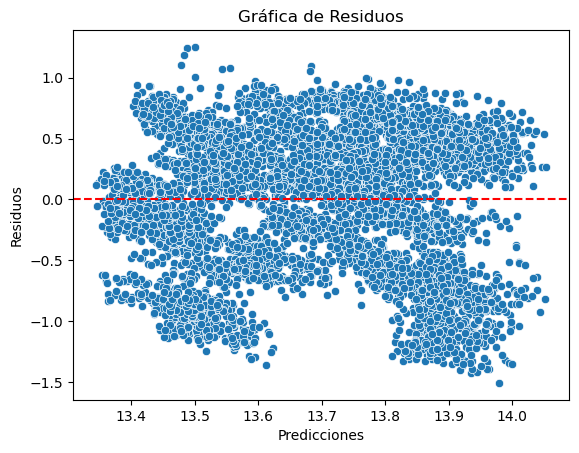

In [55]:
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicciones")
plt.ylabel("Residuos")
plt.title("Gráfica de Residuos")
plt.show()

In [56]:
nombres = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
breuschpagan = sms.het_breuschpagan(results_3.resid, results.model.exog)
lzip(nombres, breuschpagan)

[('Lagrange multiplier statistic', 409.24858673246825),
 ('p-value', 2.477009465633855e-84),
 ('f-value', 62.723286757975124),
 ('f p-value', 1.970214683244505e-87)]

El modelo representado es una regresión lineal que intenta predecir el logaritmo de las ventas semanales (log_Ventas) en función de varias variables independientes: Fecha, Semana_Festiva, Temperatura y Tienda, los cuales fueron seleccionados luego de realizar una prueba VIF en donde las variables escogidas son menores a 5, considerando a su vez un análisis simplificado del modelo para evaluar si es ideal para seleccionar que tipo de modelación se realizará:

R-cuadrado (R-squared): En este caso, el R-cuadrado es bastante bajo, alrededor de 0.082. Esto significa que solo alrededor del 8.2% de la variabilidad en el logaritmo de las ventas semanales se explica por las variables independientes incluidas en el modelo. En otras palabras, el modelo no está capturando la mayoría de la variación en las ventas semanales, lo que sugiere que faltan variables importantes o que la relación no es lineal.

Coeficientes de Regresión: Los coeficientes de regresión indican cómo cada variable independiente contribuye a la predicción de las ventas semanales.

El coeficiente de "Fecha" es muy cercano a cero (-0.0003), lo que sugiere que la fecha tiene una influencia mínima en las ventas semanales.

El coeficiente de "Semana_Festiva" es positivo (0.0184), pero no es estadísticamente significativo (p-valor de 0.528), lo que indica que no hay evidencia sólida de que las semanas festivas tengan un impacto significativo en las ventas.

El coeficiente de "Temperatura" es negativo (-0.0027) y estadísticamente significativo (p-valor cercano a cero), lo que sugiere que temperaturas más bajas están asociadas con ventas más altas.

El coeficiente de "Tienda" es negativo (-0.0122) y estadísticamente significativo, lo que indica que pertenecer a una tienda específica está asociado con ventas más bajas en promedio.

P-valores: Los p-valores son importantes para determinar la significancia estadística de cada coeficiente. En este caso, "Fecha" y "Semana_Festiva" tienen p-valores mayores que 0.05, lo que indica que no son estadísticamente significativos en la predicción de las ventas semanales. "Temperatura" y "Tienda" tienen p-valores bajos, lo que sugiere que son estadísticamente significativos.

Intercepto: El intercepto es el valor esperado de las ventas semanales cuando todas las variables independientes son iguales a cero. En este caso, el intercepto es 14.1626 en la escala del logaritmo, lo que significa que cuando todas las variables independientes son cero, las ventas semanales esperadas son e^14.1626.

Este modelo de regresión lineal parece ser inadecuado para explicar la variación en las ventas semanales. Es posible que se necesiten otras variables o que la relación entre las variables actuales y las ventas sea más compleja de lo que se puede modelar mediante una regresión lineal simple.

Según los resultados obtenidos se optará por la modelación con el Machine Learning, y la razón principal para elegir el Machine Learning en lugar de la econometría en este caso se debe a varias consideraciones:

Complejidad de los datos: Los datos incluyen múltiples variables independientes, y la relación entre estas variables y la variable dependiente (las ventas semanales) puede ser compleja y no lineal, el modelo de Machine Learning tiene la capacidad de manejar relaciones no lineales y capturar patrones complejos en los datos, los cuales pueden resultar beneficiosos para la predicción de variables.

Flexibilidad en el modelado: Los algoritmos de Machine Learning, como Random Forests, Gradient Boosting, etc, ofrecen una amplia gama de opciones para modelar datos de manera efectiva. Esto permite explorar diferentes enfoques y encontrar el que mejor se adapte a la naturaleza de los datos presentados.

Robustez ante multicolinealidad: En casos donde las variables independientes están altamente correlacionadas (multicolinealidad), un modelo de Machine Learning puede resultar más robusto que uno de regresión lineal.

Exploración de características importantes: Los modelos de Machine Learning pueden proporcionar información sobre la importancia de cada característica en la predicción, lo que puede ayudar a identificar qué variables tienen un mayor impacto en las ventas semanales y de esa forma direccionar el análisis utilizando variables que sean relevantes.

En este caso se dará enfoque a la predicción de ventas semanales, para lo cual es importante tener en cuenta que la elección del modelo específico de Machine Learning y la evaluación del rendimiento del modelo son pasos críticos en este proceso y deben realizarse acorde a la significancia de las variables.

9.- Verifique los supuestos, de haber escogido el enfoque econométrico.

In [57]:
from sklearn.linear_model import LinearRegression

In [58]:
var_cuantitativas = df.select_dtypes('number').columns
var_cualitativas  =df.select_dtypes('object').columns

In [59]:
from sklearn.preprocessing import LabelEncoder

In [60]:
labelencoder = LabelEncoder()

In [61]:
df[var_cualitativas] = df[var_cualitativas].apply(labelencoder.fit_transform)

In [62]:
df

,Tienda,Fecha,Ventas_Semanales,Semana_Festiva,Temperatura,Precio_Combustible,IPC,Desempleo,log_Ventas
0,1,19,1643690.90,0,42.31,2.572,211.096358,8.106,14.312455
1,1,52,1641957.44,1,38.51,2.548,211.242170,8.106,14.311400
2,1,85,1611968.17,0,39.93,2.514,211.289143,8.106,14.292966
3,1,118,1409727.59,0,46.63,2.561,211.319643,8.106,14.158907
4,1,20,1554806.68,0,46.50,2.625,211.350143,8.106,14.256862
...,...,...,...,...,...,...,...,...,...
6430,45,130,713173.95,0,64.88,3.997,192.013558,8.684,13.477481
6431,45,22,733455.07,0,64.89,3.985,192.170412,8.667,13.505522
6432,45,55,734464.36,0,54.47,4.000,192.327265,8.667,13.506897
6433,45,88,718125.53,0,56.47,3.969,192.330854,8.667,13.484400


In [63]:
X = df[df.columns.difference(['Ventas_Semanales'])]
y = df.Ventas_Semanales

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.30, random_state =123)

In [66]:
y_train

4563    1183571.35
6134     596554.05
5134     279643.43
2142     551799.63
3527     878314.57
           ...    
5736    1246654.24
4409    1441473.82
1376    1745928.56
3675     971557.62
3804    1599626.26
Name: Ventas_Semanales, Length: 4141, dtype: float64

In [67]:
print(X_train.shape,"",type(X_train))
print(y_train.shape,"\t ",type(y_train))
print(X_test.shape,"",type(X_test))
print(y_test.shape,"\t ",type(y_test))

(4141, 8)  <class 'pandas.core.frame.DataFrame'>
(4141,) 	  <class 'pandas.core.series.Series'>
(1776, 8)  <class 'pandas.core.frame.DataFrame'>
(1776,) 	  <class 'pandas.core.series.Series'>


In [68]:
modelo_regresion = LinearRegression()
modelo_regresion.fit(X_train, y_train)

LinearRegression()

Para este caso se ha escogido un modelo de Machine Learning por lo cual no es posible verificar los supuestos del enfoque econométrico, y se detallan en su lugar la inicialización del modelo Machine Learning con los datos de la base de Wallmart y se empezó a entrenar al modelo con los datos de entrenamiento otorgando un 30% de los datos reales valor que fue considerado por ser estándar y para actuar de forma conservadora.

Al momento con la función train el algoritmo ha aprendido las relaciones entre las variables y datos, se espera que con las categorías seleccionadas se obtenga una evaluación confiable del modelo en donde se pueda predecir su funcionamiento correctamente y se establezcan con claridad que variables podrían resultar más significativas.

10.- Obtenga el modelo definitivo, prediga los valores y comente el grado de ajuste del modelo. Justifique con métricas su respuesta.

In [69]:
predicciones_train = modelo_regresion.predict(X_train)
predicciones_test = modelo_regresion.predict(X_test)

In [70]:
len(predicciones_train)

4141

In [71]:
len(predicciones_test)

1776

In [72]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [73]:
MSE_train = mean_squared_error(y_train, predicciones_train)
MSE_test = mean_squared_error(y_test, predicciones_test)
print(MSE_train)
print(MSE_test)

20647714305.501915
20897476338.32727


In [74]:
RMSE_train = np.sqrt(MSE_train)
RMSE_test = np.sqrt(MSE_test)
print(RMSE_train)
print(RMSE_test)

143693.125463614
144559.59441810587


In [75]:
MAE_train = mean_absolute_error(y_train, predicciones_train)
MAE_test = mean_absolute_error(y_test, predicciones_test)
print(MAE_train)
print(MAE_test)

112612.56368549324
113962.72802472302


In [76]:
from sklearn.metrics import r2_score

In [77]:
r_square_train = r2_score(y_train, predicciones_train)
r_square_test  = r2_score(y_test, predicciones_test)
print('El R^2 del subconjunto de entrenamiento es:' , r_square_train.round(2))
print('El R^2 del subconjunto de prueba es:' , r_square_test.round(2))

El R^2 del subconjunto de entrenamiento es: 0.93
El R^2 del subconjunto de prueba es: 0.93


In [78]:
print('intercepto:', modelo_regresion.intercept_)
print('pendiente:', modelo_regresion.coef_) 

intercepto: -10957275.832472945
pendiente: [-1.20468673e+04 -6.03280877e+01 -4.75462188e+02 -1.31769801e+04
  3.05103055e+04  1.47641922e+03 -2.42253859e+03  8.89614869e+05]


El MSE, RMSE y MAE en ambos conjuntos (entrenamiento y prueba) son bastante similares, lo que indica que el modelo no está mostrando un sobreajuste significativo. Los valores de RMSE se ajustan a los valores de ventas semanales, lo que resulta aceptable dentro del contexto del modelo.

El coeficiente de determinación R² es alto en ambos conjuntos (0.93), lo que indica que el modelo explica aproximadamente el 93% de la variabilidad en los datos de ventas. Esto sugiere que el modelo está bien ajustado y es capaz de capturar gran parte de la variación en las ventas semanales.

Se puede considerar que el modelo seleccionado parece ser un buen ajuste para los datos y es capaz de hacer predicciones razonablemente precisas de las ventas semanales.

11.- Grafique a los valores predicho de modelo vs los valores reales.
¿Cómo se ven una vez graficados frente a los valores reales? Argumente su respuesta. 

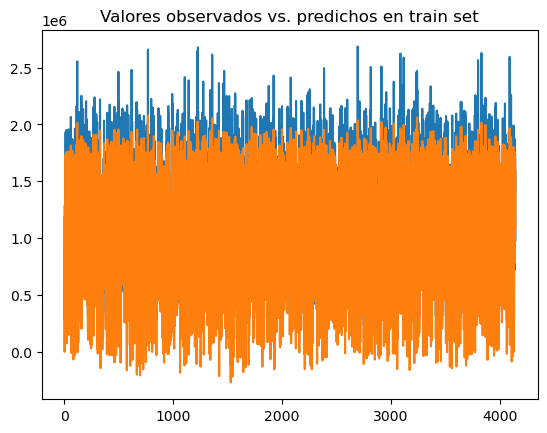

In [79]:
fig, ax = plt.subplots()
ax.plot(y_train.values)
ax.plot(predicciones_train)
plt.title("Valores observados vs. predichos en train set");

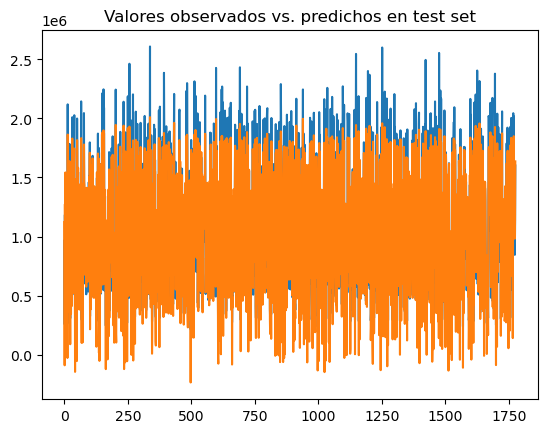

In [80]:
fig, ax = plt.subplots()
ax.plot(y_test.values)
ax.plot(predicciones_test)
plt.title("Valores observados vs. predichos en test set");

En los valores de entrenamiento se puede observar una relación entre los valores predichos y reales considerable, misma que si bien es cierto tiene un desplazamiento se ajusta en gran medida a lo esperado y  sigue una tendencia lineal, lo cual es un indicativo de que el modelo está haciendo buenas predicciones en el conjunto de entrenamiento.

Para el gráfico de prueba o test se puede observar que los valores siguen una tendencia lineal bastante similar, esto indica que el modelo generaliza bien y es capaz de hacer predicciones precisas en datos no vistos previamente.

En este caso ambos gráficos siguen una tendencia lineal, esto sugiere que el modelo tiene un buen ajuste y es capaz de hacer predicciones precisas tanto en los datos de entrenamiento como en los de prueba, por lo que, es posible considerar el modelo para hacer predicciones de las ventas semanales según las variables del dataset.

12.- Concluya sobre su modelo. Para ello, si escogió el enfoque econométrico, interprete coeficientes, por el contrario si escogió el enfoque de machine learning, determine cuáles son las variables que tienen mayor poder explicativo sobre su variable objetivo.

In [82]:
from sklearn.preprocessing import StandardScaler

In [83]:
sc = StandardScaler()

In [84]:
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [85]:
modelo_regresion_std = LinearRegression()
modelo_regresion_std.fit(X_train_std, y_train)

LinearRegression()

In [87]:
predicciones_train_std = modelo_regresion_std.predict(X_train_std)
predicciones_test_std = modelo_regresion_std.predict(X_test_std)

In [88]:
r_square_train_std = r2_score(y_train, predicciones_train_std)
r_square_test_std  = r2_score(y_test, predicciones_test_std)
print('El R^2 del subconjunto de entrenamiento es:' , r_square_train_std.round(2))
print('El R^2 del subconjunto de prueba es:' , r_square_test_std.round(2))

El R^2 del subconjunto de entrenamiento es: 0.93
El R^2 del subconjunto de prueba es: 0.93


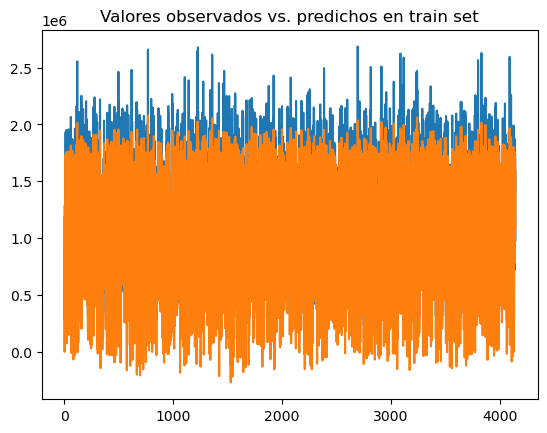

In [89]:
fig, ax = plt.subplots()
ax.plot(y_train.values)
ax.plot(predicciones_train_std)
plt.title("Valores observados vs. predichos en train set");

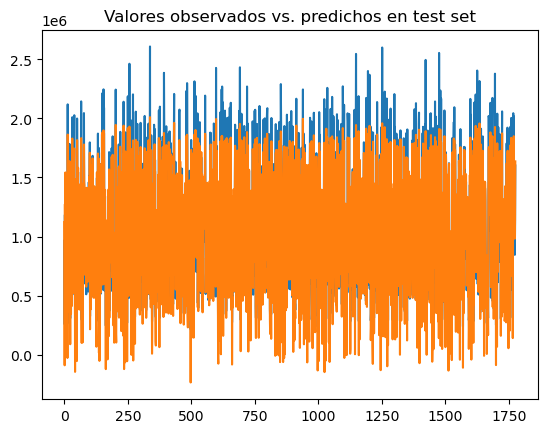

In [90]:
fig, ax = plt.subplots()
ax.plot(y_test.values)
ax.plot(predicciones_test_std)
plt.title("Valores observados vs. predichos en test set");

In [91]:
importancia = modelo_regresion_std.coef_

In [92]:
for i,v in enumerate(importancia):
    print('Variable explicativa No. %0d, Score: %.5f' % (i,v))

Variable explicativa No. 0, Score: -15040.59875
Variable explicativa No. 1, Score: -2497.87827
Variable explicativa No. 2, Score: -18565.86990
Variable explicativa No. 3, Score: -6015.13165
Variable explicativa No. 4, Score: 7933.29956
Variable explicativa No. 5, Score: 26954.90351
Variable explicativa No. 6, Score: -31702.12817
Variable explicativa No. 7, Score: 520955.37170


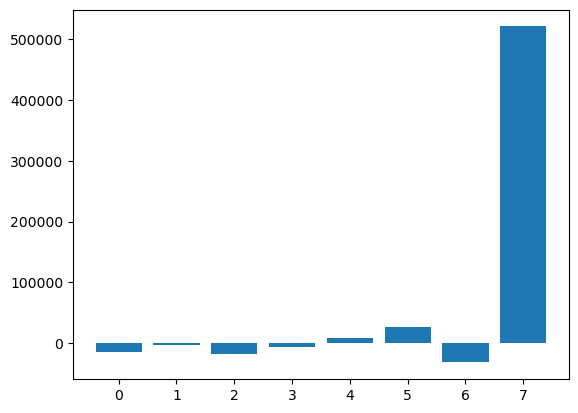

In [93]:
plt.bar([x for x in range(len(importancia))], importancia)
plt.show()

En este caso las variables que tienen mayor poder explicativo sobre nuestra variable objetivo Ventas Semanales son: IPC y Precio Combustible, para este análisis no se incluye a la variable 7 que es el logaritmo de ventas semanales ya que hace referencia a la variable objetivo.

Estas variables si bien es cierto que tienen un poder explicativo por encima de las demás, podrían representar de todos modos cierto grado de incidencia en las ventas semanales de las tiendas de Wallmart, además de eso vemos a la variable desempleo que si vemos tiene una relación negativa, también presenta un poder explicativo sobre la variable objeto, ya que presenta relación con la decisión de compra de los consumidores, esto puede ser explicado en base a indicadores macroeconómicos en donde vemos que el IPC tiene una participación singular por la inflación de los precios, la significancia de estos factores debe ser considerada dentro del análisis predictivo en la medida en que según el modelo predictivo nos lo ha representado.

De esta forma se concluye que para un análisis más específico sobre los factores a considerar el modelo de machine learning es capaz de presentar los datos con un alto grado de ajuste para este caso y que en nuestro dataset si bien existen factores que afecten la decisión de compra de los consumidores se podrían también considerar otros datos como el horario de atención, edad de los consumidores, tipos de artículos más vendidos, publicidad, etc, para revisar la decisión de compra y de esa forma comprender los niveles de ventas semanales, estas variables son posibles de medir y en cierto modo de controlar desde Wallmart, para el caso expuesto en donde las variables son macro se depende de factores externos y por ende es posible que no se explique en su totalidad las ventas obtenidas semanalmente en las 45 tiendas observadas.

13.- Suba su proyecto final en su cuenta de Github y adjunte una captura de pantalla en esta plataforma.